# Experiment 1

Checking whether a heap-like graph is actually a heap using a GGNN

In [1]:
%cd ..
%pwd
from experiments.heaps import *
import wandb

/home/tekne/Oxford/ATML/Project/ggs-nn-model


In [3]:
wandb.init(project="ggnn_heap_check")
config = wandb.config
config.n_train = 1000
config.n_test = 1000
config.epochs = 100
config.lr = 0.01
config.optimizer = 'adam'
config.min_len = 1
config.max_len = 32
config.batch_size = 500
config.p_heap = 0.5
config.graph_kind = 'tree'
config.num_layers=3
config.hidden_size=20

In [4]:
from torch_geometric.data import DataLoader

data = make_heap_test_gnn_datapoints(
    n = config.n_train + config.n_test,
    p_heap = config.p_heap,
    min_len = config.min_len,
    max_len = config.max_len,
)

training_data = DataLoader(data[:config.n_train], batch_size=config.batch_size)
testing_data = DataLoader(data[config.n_train:], batch_size=config.batch_size)

In [5]:
print("Training batches:")
for data in training_data:
    print(data)

print("Test batches:")
for data in testing_data:
    print(data)

Training batches:
Batch(batch=[8480], edge_index=[2, 7980], x=[8480, 1], y=[500])
Batch(batch=[8383], edge_index=[2, 7883], x=[8383, 1], y=[500])
Test batches:
Batch(batch=[8142], edge_index=[2, 7642], x=[8142, 1], y=[500])
Batch(batch=[7958], edge_index=[2, 7458], x=[7958, 1], y=[500])


In [6]:
from ggnns.graph_level_ggnn import GraphLevelGGNN

NUM_CLASSES = 2

model = GraphLevelGGNN(
    annotation_size=1,
    num_layers=config.num_layers,
    gate_nn=nn.Linear(2 * 1 + config.hidden_size, 1),
    hidden_size=config.hidden_size,
    final_layer=nn.Linear(2 * 1 + config.hidden_size, NUM_CLASSES),
).cuda()

In [7]:
opt = torch.optim.Adam(model.parameters(), lr=config.lr)

In [8]:
from experiments.utils import *

loss = torch.nn.CrossEntropyLoss()

results = train(
    model=model,
    opt=opt,
    training_data=training_data,
    testing_data=testing_data,
    criterion=lambda out, y: loss(out, y),
    checker=lambda out, y: ((torch.argmax(out, dim=-1) == y).sum(), y.shape[0]),
    epochs=config.epochs
)

100%|██████████| 100/100 [00:09<00:00, 10.75it/s]


In [9]:
import matplotlib.pyplot as plt

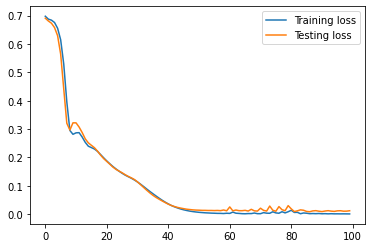

In [10]:
plt.plot(results["train_loss"], label="Training loss")
plt.plot(results["test_loss"], label="Testing loss")
plt.legend()
plt.show()

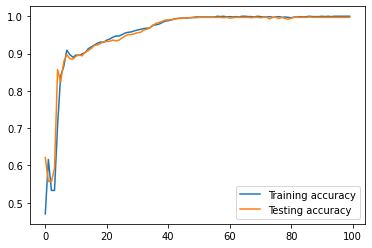

In [11]:
plt.plot(results["train_accuracy"], label="Training accuracy")
plt.plot(results["test_accuracy"], label="Testing accuracy")
plt.legend()
plt.show()

In [12]:
wandb.init(project="ggnn_heap_check")
config = wandb.config
config.n_train = 1000
config.n_test = 1000
config.epochs = 100
config.lr = 0.01
config.optimizer = 'adam'
config.min_len = 1
config.max_len = 32
config.batch_size = 500
config.p_heap = 0.5
config.graph_kind = 'linear'
config.num_layers=3
config.hidden_size=20

In [ ]:
from torch_geometric.data import DataLoader

data = make_heap_test_gnn_datapoints(
    n = config.n_train + config.n_test,
    p_heap = config.p_heap,
    min_len = config.min_len,
    max_len = config.max_len,
    graph_generators = [(directed_path_graph, True)]
)

training_data = DataLoader(data[:config.n_train], batch_size=config.batch_size)
testing_data = DataLoader(data[config.n_train:], batch_size=config.batch_size)